Useful Definitions:

A. Strict restrictions on cross-border data flows:
 I: Local storage requirement;
 II: Local storage and processing requirement;
 III: Ban on data transfer (i.e. local storage, local processing and local access
 requirement).
 
 
B. Conditional restrictions to cross-border data flows:
 IV: Conditional flow regime where conditions apply to the recipient country;
 V: Conditional flow regime where conditions apply to the data controller or
 data processor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('regulations_data.csv')

## EDA

In [3]:
df.head()

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Data_Localization,Time,Timeframe,References,References_2,References_3,References_4
0,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Restriction on online sales,E-retail,"Three US States (Alabama, Oklahoma and Utah) p...",NaN,2016.0,Reported in 2016,http://www.ncsl.org/research/financial-service...,NaN,NaN,NaN
1,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Restriction on online sales,E-retail,While it is possible to sell drugs online in t...,NaN,NaN,NaN,http://www.fda.gov/AboutFDA/Transparency/Basic...,http://patients.about.com/od/savemoneyondrugs/...,http://www.cnbc.com/2014/05/23/patients-cross-...,https://www.canadapost.ca/tools/pg/manual/PGcu...
2,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Revised Code of Washington (RCW),E-retail,"Since July 2009, ordering most of tobacco prod...",NaN,2009.0,Since July 2009,http://www.atg.wa.gov/ban-internet-and-mail-or...,NaN,NaN,NaN
3,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Wire Act (1961) \n\nIllegal Gambling Business ...,Online gambling,Overlapping Federal and State regulations proh...,NaN,1961.0,Since 1961,https://www.wto.org/english/tratop_e/dispu_e/c...,https://www.law.cornell.edu/uscode/text/18/1084,http://www.fbi.gov/news/stories/2007/june/gamb...,NaN
4,UNITED STATES,Online sales and transactions,Domain name (DNS) registration requirements,Trading restrictions,usTLD Nexus Requirements Policy,Horizontal,Foreign entities or organizations need a bona ...,NaN,NaN,NaN,http://www.neustar.us/the-ustld-nexus-requirem...,http://www.business-sweden.se/Export/Exportreg...,NaN,NaN


In [4]:
df.shape

(1821, 14)

In [5]:
df.columns

Index(['Country', 'Chapter', 'Subchapter', 'Type', 'Act/Practice', 'Coverage',
       'Description', 'Data_Localization', 'Time', 'Timeframe', 'References',
       'References_2', 'References_3', 'References_4'],
      dtype='object')

In [6]:
df.Country.unique()

array(['UNITED STATES', 'TURKEY', 'SWITZERLAND', 'SOUTH AFRICA', 'RUSSIA',
       'PARAGUAY', 'PANAMA', 'PAKISTAN', 'NORWAY', 'NIGERIA', 'INDIA',
       'ISRAEL', 'ICELAND', 'UNITED KINGDOM', 'SWEDEN', 'SPAIN',
       'SLOVENIA', 'SLOVAKIA', 'ROMANIA', 'PORTUGAL', 'POLAND',
       'NETHERLANDS', 'MALTA', 'LUXEMBOURG', 'LATVIA', 'LITHUANIA',
       'ITALY', 'IRELAND', 'HUNGARY', 'GREECE', 'GERMANY', 'FRANCE',
       'FINLAND', 'ESTONIA', 'DENMARK', 'CZECH REPUBLIC', 'CYPRUS',
       'CROATIA', 'BULGARIA', 'BELGIUM', 'AUSTRIA', 'ECUADOR',
       'COSTA RICA', 'COLOMBIA', 'ARGENTINA', 'THAILAND', 'TAIWAN',
       'SINGAPORE', 'PHILIPPINES', 'NEW ZEALAND', 'MEXICO', 'MALAYSIA',
       'KOREA', 'JAPAN', 'INDONESIA', 'HONG KONG', 'CHILE', 'CANADA',
       'BRUNEI', 'PERU', 'AUSTRALIA', 'VIETNAM', 'CHINA', 'BRAZIL',
       'EUROPEAN UNION', '0'], dtype=object)

In [7]:
len(df.Country.unique())

66

In [8]:
df_type_dataFlow = df[df.Subchapter == 'Restrictions on cross-border data flows']

In [9]:
df_type_dataFlow.shape

(108, 14)

In [10]:
len(df_type_dataFlow.Country.unique())

46

In [11]:
df_type_dataFlow.head()

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Data_Localization,Time,Timeframe,References,References_2,References_3,References_4
17,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,California Consumer Privacy Act of 2018,Horizontal,While in the United States there is no nationa...,NaN,2018.0,Since 2018,https://oag.ca.gov/system/files/initiatives/pd...,https://oag.ca.gov/system/files/initiatives/pd...,https://www.theverge.com/2018/6/28/17509720/ca...,https://www.caprivacy.org/facts
18,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,NaN,Horizontal,There are few limits on the transfer of person...,NaN,NaN,NaN,http://uk.practicallaw.com/6-502-0467#a57587,NaN,NaN,NaN
19,UNITED STATES,Data policies,Restrictions on cross-border data flows,Restrictions on data,Network Security Agreements,Telecommunication sector,It is reported that foreign communications inf...,NaN,1999.0,Since 1999,https://publicintelligence.net/us-nsas/,https://www.washingtonpost.com/business/techno...,https://info.publicintelligence.net/US-NSAs/US...,NaN
69,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Electronic Communications Act,Electronic communications sector,The transfer of traffic and location data abro...,NaN,2008.0,Since November 2008,http://uk.practicallaw.com/7-520-1896,NaN,NaN,NaN
70,TURKEY,Data policies,Restrictions on cross-border data flows,Restrictions on data,Data Protection Law No. 6698,Horizontal,The legislation stipulates that data cannot be...,NaN,2016.0,Since April 2016,http://www.mondaq.com/turkey/x/480822/Data+Pro...,http://uk.practicallaw.com/7-520-1896#a350846,http://www.adalet.gov.tr/Tasarilar/kisisel_ver...,NaN


#### Total number of countries with legislation regarding "Restrictions on cross border data flows" in 2019

In [12]:
# Total number of countries represented in this dataset
len(df_type_dataFlow.Country.unique())

46

In [13]:
# Sectors the data transfer laws affect
df_type_dataFlow.Coverage.value_counts()

Horizontal                                                                                                                        52
Public sector                                                                                                                      7
Financial sector                                                                                                                   7
Telecommunication sector                                                                                                           3
Health sector                                                                                                                      3
"Electronic systems operators for public service"                                                                                  3
Maps services                                                                                                                      2
Cloud services, public sector data                                   

In [14]:
# Counrties and total number Restrictions on cross-border data flows laws
df_type_dataFlow.Country.value_counts()

CHINA             10
INDIA              6
RUSSIA             6
KOREA              5
GERMANY            5
CANADA             5
INDONESIA          5
VIETNAM            4
TURKEY             4
TAIWAN             3
BRAZIL             3
UNITED STATES      3
DENMARK            3
SWEDEN             3
BELGIUM            3
UNITED KINGDOM     2
NEW ZEALAND        2
NIGERIA            2
ROMANIA            2
ARGENTINA          2
COLOMBIA           2
JAPAN              2
AUSTRALIA          2
SINGAPORE          2
SLOVENIA           1
FINLAND            1
LUXEMBOURG         1
PERU               1
POLAND             1
THAILAND           1
CHILE              1
PHILIPPINES        1
MEXICO             1
EUROPEAN UNION     1
SPAIN              1
ISRAEL             1
BRUNEI             1
SOUTH AFRICA       1
NETHERLANDS        1
MALAYSIA           1
BULGARIA           1
PORTUGAL           1
GREECE             1
PAKISTAN           1
FRANCE             1
ITALY              1
Name: Country, dtype: int64

In [15]:
# Countries and number of data localization specific laws
df_type_dataFlow.groupby('Country').agg({'Data_Localization':'count'})

,Data_Localization
Country,
ARGENTINA,0
AUSTRALIA,1
BELGIUM,0
BRAZIL,0
BRUNEI,1
BULGARIA,0
CANADA,2
CHILE,0
CHINA,7


## EDA in pre Snowden

Total number of countries with legislation regarding "Restrictions on cross border data flows" pre Snowden (2013)

In [16]:
df_type_dataFlow_Snowden = df_type_dataFlow[df_type_dataFlow.Time < 2013]

In [17]:
len(df_type_dataFlow_Snowden.Country.unique())

33

In [18]:
df_type_dataFlow_Snowden.Coverage.value_counts()

Horizontal                                                               28
Public sector                                                             5
Financial sector                                                          4
"Electronic systems operators for public service"                         2
Telecommunication sector                                                  2
Electronic communications sector                                          1
Health sector                                                             1
Mainland China                                                            1
Telecommunication services and cloud services                             1
Dropbox, Google Apps, Microsoft's Office 365 and other cloud services     1
Advertising services                                                      1
"Online service providers"                                                1
Gambing sector                                                            1
Gambling sec

In [19]:
df_type_dataFlow_Snowden.Country.value_counts()

CANADA            5
CHINA             4
INDONESIA         3
DENMARK           3
BELGIUM           3
INDIA             2
AUSTRALIA         2
NEW ZEALAND       2
TAIWAN            2
PERU              1
TURKEY            1
GERMANY           1
FINLAND           1
PAKISTAN          1
UNITED STATES     1
NIGERIA           1
ROMANIA           1
LUXEMBOURG        1
COLOMBIA          1
VIETNAM           1
POLAND            1
SLOVENIA          1
MEXICO            1
RUSSIA            1
SPAIN             1
KOREA             1
NETHERLANDS       1
UNITED KINGDOM    1
SWEDEN            1
PORTUGAL          1
GREECE            1
BULGARIA          1
ITALY             1
Name: Country, dtype: int64

In [20]:
# The number of data specific restriction laws

pre_Snowden_total_data_laws = len(df_type_dataFlow_Snowden.Data_Localization)
pre_Snowden_total_data_laws

50

In [21]:
# The number of data localization laws
pre_Snowden_total_data_localization_laws = df_type_dataFlow_Snowden.Data_Localization.value_counts()[0]
pre_Snowden_total_data_localization_laws

7

## EDA in post Snowden

In [22]:
df_type_dataFlow_post_Snowden = df_type_dataFlow[df_type_dataFlow.Time >= 2013]

In [23]:
len(df_type_dataFlow_post_Snowden.Country.unique())

27

In [24]:
df_type_dataFlow_post_Snowden.Coverage.value_counts()

Horizontal                                                                                                                        23
Health sector                                                                                                                      2
Cloud services, public sector data                                                                                                 2
Maps services                                                                                                                      2
Financial sector                                                                                                                   2
Foreign "telecom services" and "internet services"                                                                                 1
Public procurement of cloud-computing services                                                                                     1
"Organizers of information distribution in the Internet"             

In [25]:
df_type_dataFlow_post_Snowden.Country.value_counts()

CHINA             6
RUSSIA            5
INDIA             4
KOREA             4
GERMANY           4
BRAZIL            3
VIETNAM           3
ARGENTINA         2
JAPAN             2
TURKEY            2
INDONESIA         2
SINGAPORE         2
THAILAND          1
MALAYSIA          1
ISRAEL            1
EUROPEAN UNION    1
UNITED KINGDOM    1
SOUTH AFRICA      1
COLOMBIA          1
ROMANIA           1
NIGERIA           1
UNITED STATES     1
TAIWAN            1
CHILE             1
PHILIPPINES       1
FRANCE            1
BRUNEI            1
Name: Country, dtype: int64

In [26]:
# The number of data specific restriction laws

post_Snowden_total_data_laws = len(df_type_dataFlow_post_Snowden.Data_Localization )
print(post_Snowden_total_data_laws)

54


In [27]:
# The number of data localization laws

post_Snowden_total_data_localization_laws = df_type_dataFlow_post_Snowden.Data_Localization.value_counts()[0]
post_Snowden_total_data_localization_laws

21

________

### Insight 1: Looking at what percent data localization specific laws were of all data related laws for pre and post Snowden

In [28]:
pre_Snowden_data_law_percent =  (pre_Snowden_total_data_localization_laws/ pre_Snowden_total_data_laws) 
pre_Snowden_data_law_percent

0.14

In [29]:
post_Snowden_data_law_percent =  (post_Snowden_total_data_localization_laws/ post_Snowden_total_data_laws) 
post_Snowden_data_law_percent

0.3888888888888889

In [30]:
percent_Change = ((post_Snowden_data_law_percent - pre_Snowden_data_law_percent)/pre_Snowden_data_law_percent) * 100
percent_Change

177.77777777777774

There is a 178% increase in percentage of data localization specific laws from pre snowden to post snowden era.

### Insight 2: Time trend

In [32]:
time = df_type_dataFlow.Time.value_counts().rename_axis('Year').reset_index(name='Count')
time.drop(time.index[28], inplace =True)
time.Year = time.Year.astype(int)
full_timeList = list(range(1972, 2020))

for i in full_timeList:
    if i in list(time['Year']):
        continue
    else:
        time = time.append({'Year': i, 'Count':0}, ignore_index= True)
        
        
time.sort_values(by='Year', inplace=True)
time.reset_index(inplace = True)
time.drop('index', axis=1, inplace = True)
time.reset_index(inplace = True)
time['index'] += 1

1.5773541133188187
0.7321852835319371


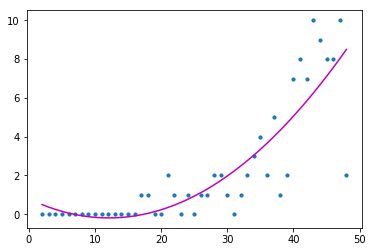

In [34]:
x = time["index"][1:, np.newaxis]
Y = time["Count"][1:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### Insight 3: Number of Countries with explicit data localization/storage requirements in their data legislation

In [35]:
number_countries_w_DL = len(df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']['Country'].unique())
print('Number of countries with data localization/storage requirements in their laws: ', number_countries_w_DL)

Number of countries with data localization/storage requirements in their laws:  11


In [90]:
print('Percentage of coutnries with DL/Storage laws:  ', int((number_countries_w_DL/195) *100), '%')

Percentage of coutnries with DL/Storage laws:   5 %


### Insight 4: Data Localization/Soveriegnty law frequency per year

In [93]:
df_DL_Yes = df_type_dataFlow[df_type_dataFlow['Data_Localization'] == 'Yes']
df_DL_Yes['Time']= df_DL_Yes['Time'].astype(int)

C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Data Localization Laws passed per Year')

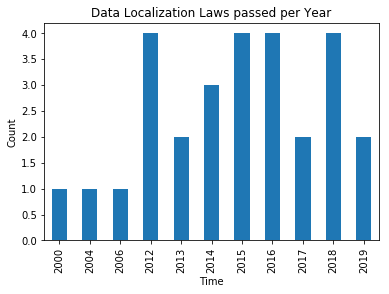

In [104]:
df_DL_Yes_count = df_DL_Yes.groupby('Time').count()['Data_Localization']
df_DL_Yes_count.plot('bar')
plt.ylabel('Count')
plt.title('Data Localization Laws passed per Year')

### What I did this week:
- Added a few more insights
- Looked into data for next steps section.

### Next Steps:
- Look at sector specific trends.
- Rank countries by their data localization requirements. If the law is horizontal, sector specific, provides conditions.
- Explore for data on pending legislation regarding data localization/soveriegnty 

___

## Test Code


In [36]:
time.head()

,index,Year,Count
0,1,1972,1
1,2,1973,0
2,3,1974,0
3,4,1975,0
4,5,1976,0


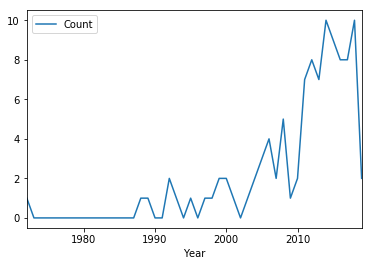

In [37]:
time_plot = time.plot.line(x = 'Year', y = 'Count')

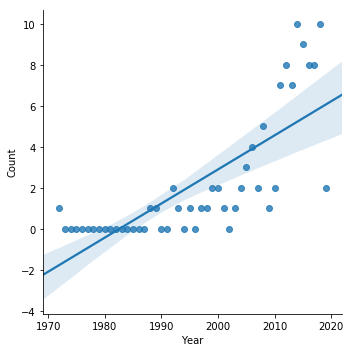

In [38]:
time_plot_v2 = sns.lmplot(x='Year',y='Count',data=time,fit_reg=True)

1.5615664267843348
0.7327555400790073


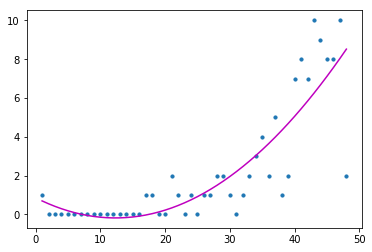

In [39]:
# transforming the data to include another axis
x = X[:, np.newaxis]
Y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [40]:
degree = 3

df_poly = pd.DataFrame(columns=['y', 'x'])
df_poly['x'] = X
df_poly['y'] = y

weights = np.polyfit(X, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(X)', data=df_poly).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           8.67e-15
Time:                        10:17:13   Log-Likelihood:                -89.471
No. Observations:                  48   AIC:                             182.9
Df Residuals:                      46   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.388e-15      0.299   4.64e-15      1.000      -0.602       0.602
model(X)       1.0000      0.089     11.241      0.000       0.821       1.179
==============================================================================
Omnibus:                       27.629   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.009
Skew:                          -1.420   Prob(JB):                     4.23e-18
Kurtosis:                       8.652   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""